In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import requests
from io import BytesIO
from collections import defaultdict
import random
import matplotlib.cm as cm

In [5]:
# 파일 경로
full_json_path = './coco/annotations/instances_val2017.json'      # 전체 dataset
subset_json_path = './coco_small.json'           # small object dataset

In [6]:
# Load both datasets
with open(full_json_path, 'r') as f:
    full_data = json.load(f)
with open(subset_json_path, 'r') as f:
    subset_data = json.load(f)

# category mapping
category_id_to_name = {cat['id']: cat['name'] for cat in full_data['categories']}

# annotations indexing
def build_image_to_anns(annotations):
    img_to_anns = defaultdict(list)
    for ann in annotations:
        img_to_anns[ann['image_id']].append(ann)
    return img_to_anns

full_img_map = {img['id']: img for img in full_data['images']}
subset_img_map = {img['id']: img for img in subset_data['images']}

full_anns_map = build_image_to_anns(full_data['annotations'])
subset_anns_map = build_image_to_anns(subset_data['annotations'])

# 공통 image_id 중 하나 선택
common_image_ids = list(set(full_img_map.keys()) & set(subset_img_map.keys()))
sample_image_id = random.choice(common_image_ids)

# 이미지 정보
img_info = full_img_map[sample_image_id]
image_url = img_info['coco_url']

# 이미지 로드
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

/tmp/ipykernel_21481/2159728441.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', 80)


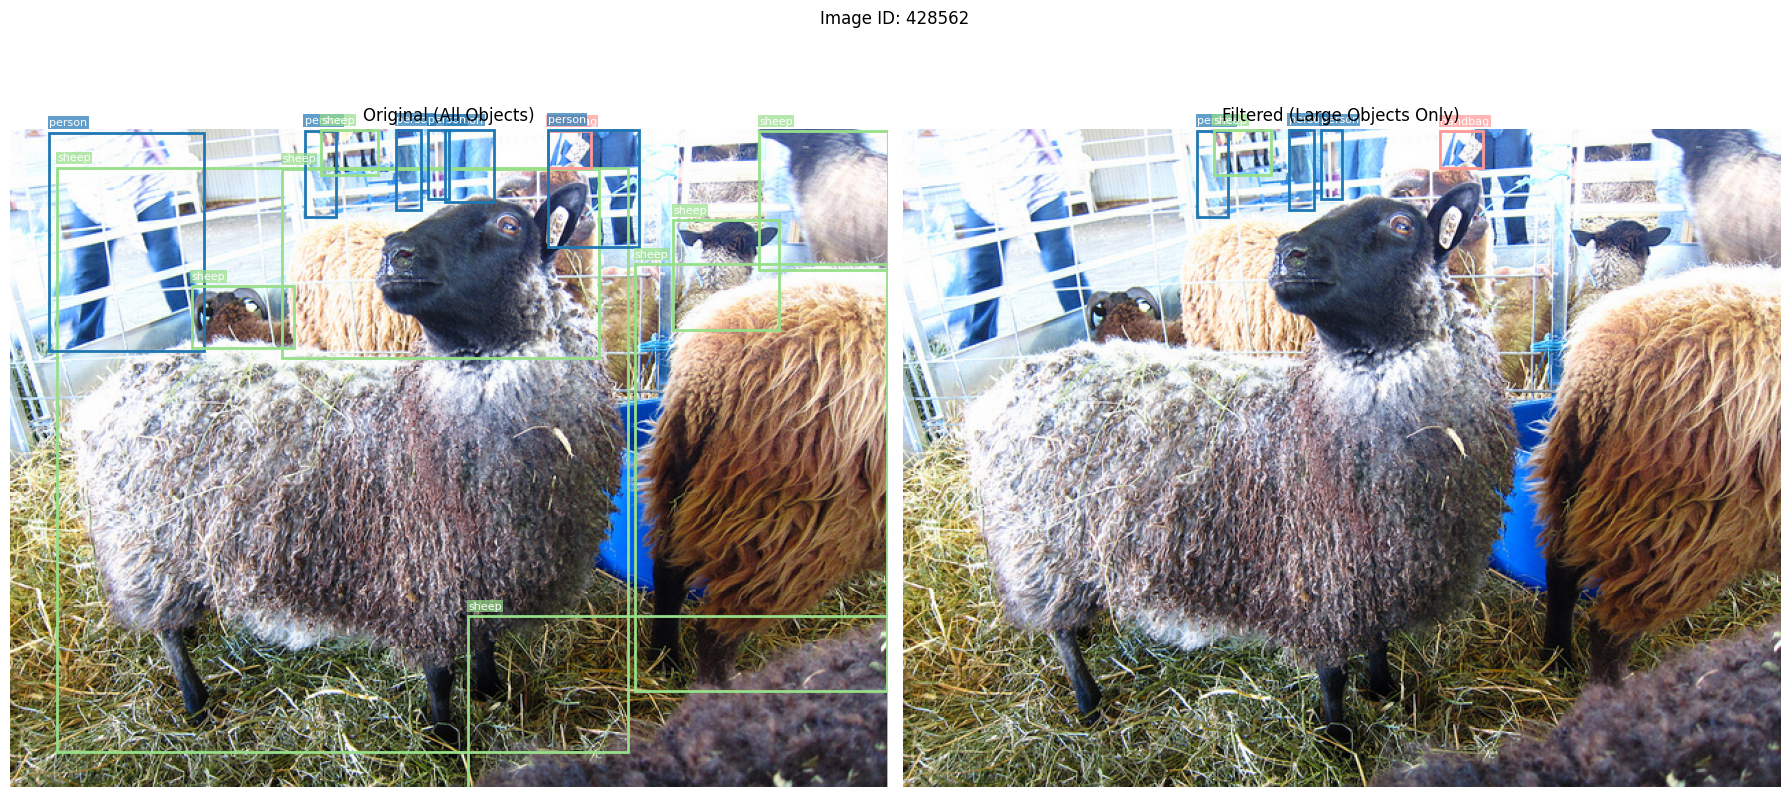

In [7]:
# colormap (다양한 색상)
cmap = cm.get_cmap('tab20', 80)
def get_color(category_id): return cmap(category_id % 80)

# 시각화 함수
def draw_boxes(ax, anns, title):
    ax.imshow(img)
    for ann in anns:
        bbox = ann['bbox']
        cat_id = ann['category_id']
        color = get_color(cat_id)
        label = category_id_to_name.get(cat_id, "unknown")
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                 linewidth=2, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        ax.text(
            bbox[0], bbox[1] - 5, label,
            fontsize=8, color='white',
            bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', pad=1)
        )
    ax.set_title(title)
    ax.axis('off')

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
draw_boxes(ax1, full_anns_map[sample_image_id], "Original (All Objects)")
draw_boxes(ax2, subset_anns_map[sample_image_id], "Filtered (Large Objects Only)")
plt.suptitle(f"Image ID: {sample_image_id}")
plt.tight_layout()
plt.show()